In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report, precision_score, recall_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# Load the dataset
df2=df2 = pd.read_csv(r'C:\Users\Shadow\Project Excelr\df_clean.csv')
dataset = df2

# 1.Logistic Regression model with k-means clustering

In [3]:

# Cluster the dataset using KMeans
kmeans = KMeans(n_clusters=2, random_state=42)#value for k = 2 
dataset['cluster'] = kmeans.fit_predict(dataset[['length', 'margin_low']])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dataset[['length', 'margin_low', 'cluster']], dataset['is_genuine'], test_size=0.30, random_state=42)#data for training model 30%


c:\Users\Shadow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Shadow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


In [4]:

# Train the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Test the model
y_pred = logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred)

print(f'Accuracy_logreg: {accuracy_logreg} ')

Accuracy_logreg: 0.9862068965517241 


In [5]:


print('Accuracy is: ', accuracy_logreg*100)
print(classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test,y_pred))

precision_logreg = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_logreg = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_logreg = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_logreg = round(accuracy_score(y_test,y_pred),2)

Accuracy is:  98.62068965517241
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98       132
         1.0       0.99      0.99      0.99       303

    accuracy                           0.99       435
   macro avg       0.99      0.98      0.98       435
weighted avg       0.99      0.99      0.99       435

[[128   4]
 [  2 301]]


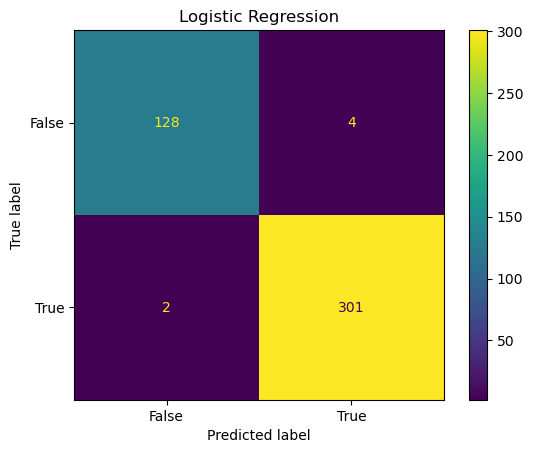

Accuracy_logreg: 0.99


In [6]:

confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.title('Logistic Regression')
plt.show()
print(f'Accuracy_logreg: {accuracy_logreg}')

# 2.KNN model

In [7]:

# Train the model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Test the model
y_pred = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred)

print(f'Accuracy_knn: {accuracy_knn}')

Accuracy_knn: 0.9908045977011494


In [30]:
import pickle
filename="knn_bill.pkl"
pickle.dump(knn,open(filename,'wb'))


In [8]:

print('Accuracy is: ', accuracy_knn *100)

print(classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test,y_pred))

precision_knn = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_knn = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_knn = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_knn = round(accuracy_score(y_test,y_pred),2)

Accuracy is:  99.08045977011494
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       132
         1.0       1.00      0.99      0.99       303

    accuracy                           0.99       435
   macro avg       0.99      0.99      0.99       435
weighted avg       0.99      0.99      0.99       435

[[131   1]
 [  3 300]]


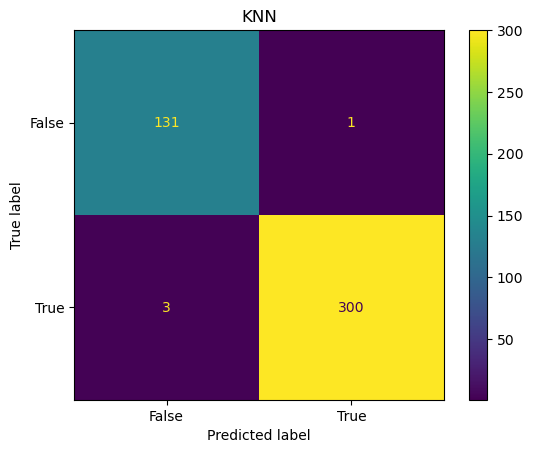

Accuracy_knn: 0.99


In [9]:

confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.title('KNN')
plt.show()
print(f'Accuracy_knn: {accuracy_knn}')

# 3.Decision tree classifier

In [10]:

# Train the model
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# Test the model
y_pred = dtc.predict(X_test)
accuracy_dtc = accuracy_score(y_test, y_pred)

print(f'Accuracy_dtc: {accuracy_dtc}')


Accuracy_dtc: 0.9862068965517241


In [11]:

print('Accuracy is: ', accuracy_dtc*100)
print(classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

precision_dtc = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_dtc= round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_dtc = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_dtc = round(accuracy_score(y_test,y_pred),2)

Accuracy is:  98.62068965517241
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98       132
         1.0       0.99      0.99      0.99       303

    accuracy                           0.99       435
   macro avg       0.98      0.99      0.98       435
weighted avg       0.99      0.99      0.99       435

[[130   2]
 [  4 299]]


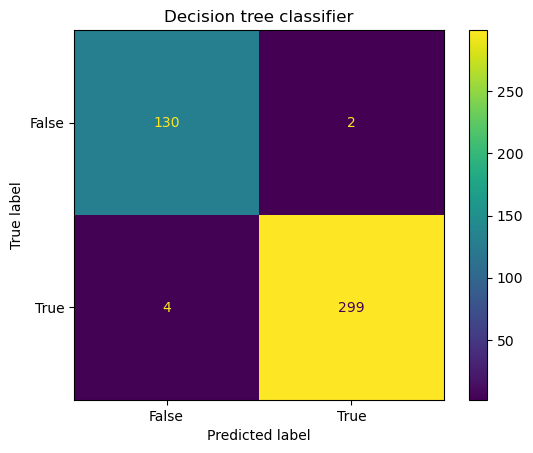

Accuracy_dtc: 0.99


In [12]:

confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.title('Decision tree classifier')
plt.show()
print(f'Accuracy_dtc: {accuracy_dtc}')

# 4.Random Forest Classifier

In [13]:
rfc = RandomForestClassifier()
# Train the model
rfc.fit(X_train, y_train)
rfc.fit(X_train, y_train)

# Test the model
y_pred = rfc.predict(X_test)
accuracy_rfc = accuracy_score(y_test, y_pred)

print(f'Accuracy_rfc: {accuracy_rfc}')


Accuracy_rfc: 0.9885057471264368


In [14]:

print('Accuracy is: ', accuracy_rfc*100)
print(classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

precision_rfc = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_rfc = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_rfc = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_rfc = round(accuracy_score(y_test,y_pred),2)

Accuracy is:  98.85057471264368
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       132
         1.0       0.99      0.99      0.99       303

    accuracy                           0.99       435
   macro avg       0.99      0.99      0.99       435
weighted avg       0.99      0.99      0.99       435

[[130   2]
 [  3 300]]


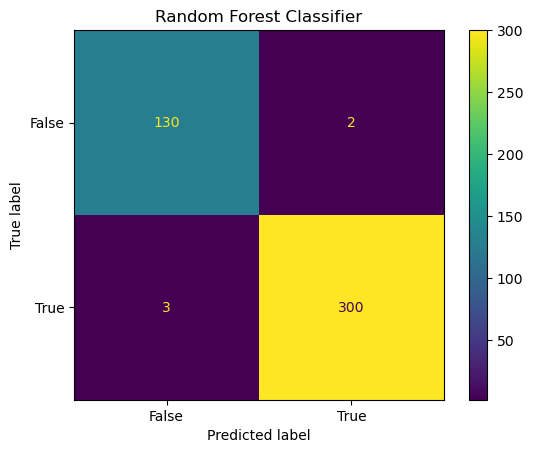

Accuracy_rfc: 0.99


In [15]:

confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.title('Random Forest Classifier')
plt.show()
print(f'Accuracy_rfc: {accuracy_rfc}')

# 5.AdaBoost Classifier

In [16]:

abc = AdaBoostClassifier()

# Train the model
abc.fit(X_train, y_train)
abc.fit(X_train, y_train)

# Test the model
y_pred = abc.predict(X_test)
accuracy_abc = accuracy_score(y_test, y_pred)

print(f'Accuracy_abc: {accuracy_abc}')

Accuracy_abc: 0.9885057471264368


In [17]:

print('Accuracy is: ', accuracy_abc*100)
print(classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

precision_abc = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_abc = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_abc = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_abc = round(accuracy_score(y_test,y_pred),2)

Accuracy is:  98.85057471264368
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       132
         1.0       0.99      0.99      0.99       303

    accuracy                           0.99       435
   macro avg       0.99      0.99      0.99       435
weighted avg       0.99      0.99      0.99       435

[[130   2]
 [  3 300]]


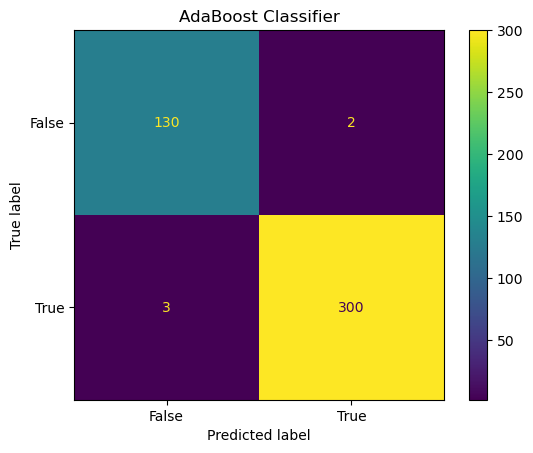

Accuracy_abc: 0.99


In [18]:

confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.title('AdaBoost Classifier')
plt.show()
print(f'Accuracy_abc: {accuracy_abc}')

# 6.GradientBoosting Classifier

In [19]:

gbc = GradientBoostingClassifier()

# Train the model
gbc.fit(X_train, y_train)
gbc.fit(X_train, y_train)

# Test the model
y_pred = gbc.predict(X_test)
accuracy_gbc = accuracy_score(y_test, y_pred)

print(f'Accuracy_gbc: {accuracy_gbc}')


Accuracy_gbc: 0.9885057471264368


In [20]:

print('Accuracy is: ', accuracy_gbc*100)
print(classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

precision_gbc = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_gbc = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_gbc = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_gbc = round(accuracy_score(y_test,y_pred),2)

Accuracy is:  98.85057471264368
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       132
         1.0       1.00      0.99      0.99       303

    accuracy                           0.99       435
   macro avg       0.98      0.99      0.99       435
weighted avg       0.99      0.99      0.99       435

[[131   1]
 [  4 299]]


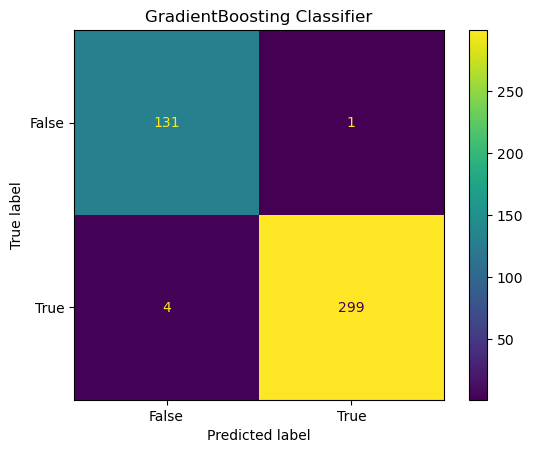

Accuracy_gbc: 0.99


In [21]:

confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.title('GradientBoosting Classifier')
plt.show()
print(f'Accuracy_gbc: {accuracy_gbc}')

# 7.Ensemble learning

In [22]:

# Create the base models
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()
abc = AdaBoostClassifier()

# Create the ensemble model
ensemble = VotingClassifier(estimators=[('rfc', rfc), ('gbc', gbc), ('abc', abc)], voting='hard')

# Train the model
ensemble.fit(X_train, y_train)

# Test the model
y_pred = ensemble.predict(X_test)
accuracy_ens = accuracy_score(y_test, y_pred)

print(f'Accuracy_ens: {accuracy_ens}')


Accuracy_ens: 0.9908045977011494


In [23]:
print('Accuracy is: ', accuracy_ens*100)
print(classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

precision_ens = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_ens = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_ens = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_ens = accuracy_score(y_test,y_pred)

Accuracy is:  99.08045977011494
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       132
         1.0       1.00      0.99      0.99       303

    accuracy                           0.99       435
   macro avg       0.99      0.99      0.99       435
weighted avg       0.99      0.99      0.99       435

[[131   1]
 [  3 300]]


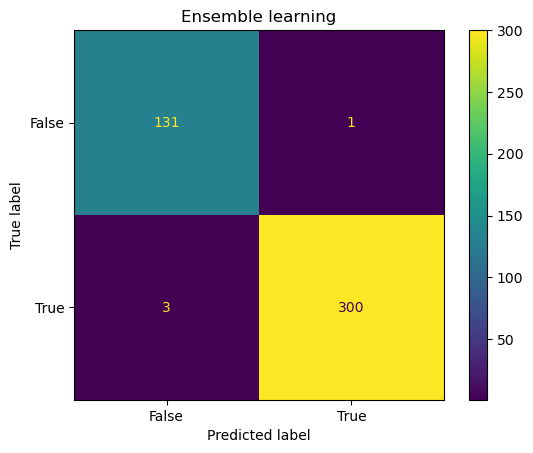

Accuracy_ens: 0.9908045977011494


In [24]:

confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.title('Ensemble learning')
plt.show()
print(f'Accuracy_ens: {accuracy_ens}')

# Models table

In [25]:
Evaluation = {"Models":pd.Series(["Logistic Regression","KNN Classifier","DecisionTree Classifier","RandomForest Classifier",
                                  "AdaBoost Classifier","Gradient Boosting Classifier","Ensemble Classifier"]),\
        "Accuracy(%)":pd.Series([accuracy_logreg,accuracy_knn,accuracy_dtc,accuracy_rfc,accuracy_abc,accuracy_gbc,accuracy_ens]),\
             "Precision(%)":pd.Series([precision_logreg,precision_knn,precision_dtc,precision_rfc,precision_abc,precision_gbc,precision_ens]),\
             "Recall(%)":pd.Series([recall_logreg,recall_knn,recall_dtc,recall_rfc,recall_abc,recall_gbc,recall_ens]),\
             "F1-Score(%)":pd.Series([f1_logreg,f1_knn,f1_dtc,f1_rfc,f1_abc,f1_gbc,f1_ens])}
table = pd.DataFrame(Evaluation)
table

,Models,Accuracy(%),Precision(%),Recall(%),F1-Score(%)
0,Logistic Regression,0.990000,0.99,0.98,0.98
1,KNN Classifier,0.990000,0.99,0.99,0.99
2,DecisionTree Classifier,0.990000,0.98,0.99,0.98
3,RandomForest Classifier,0.990000,0.99,0.99,0.99
4,AdaBoost Classifier,0.990000,0.99,0.99,0.99
5,Gradient Boosting Classifier,0.990000,0.98,0.99,0.99
6,Ensemble Classifier,0.990805,0.99,0.99,0.99


In [26]:
model_names = ["Logistic Regression","KNN Classifier","DecisionTree Classifier","RandomForest Classifier","AdaBoost Classifier","Gradient Boosting Classifier","Ensemble Classifier"]
accuracies = [accuracy_logreg*100,accuracy_knn*100,accuracy_dtc*100,accuracy_rfc*100,accuracy_abc*100,accuracy_gbc*100,accuracy_ens*100]

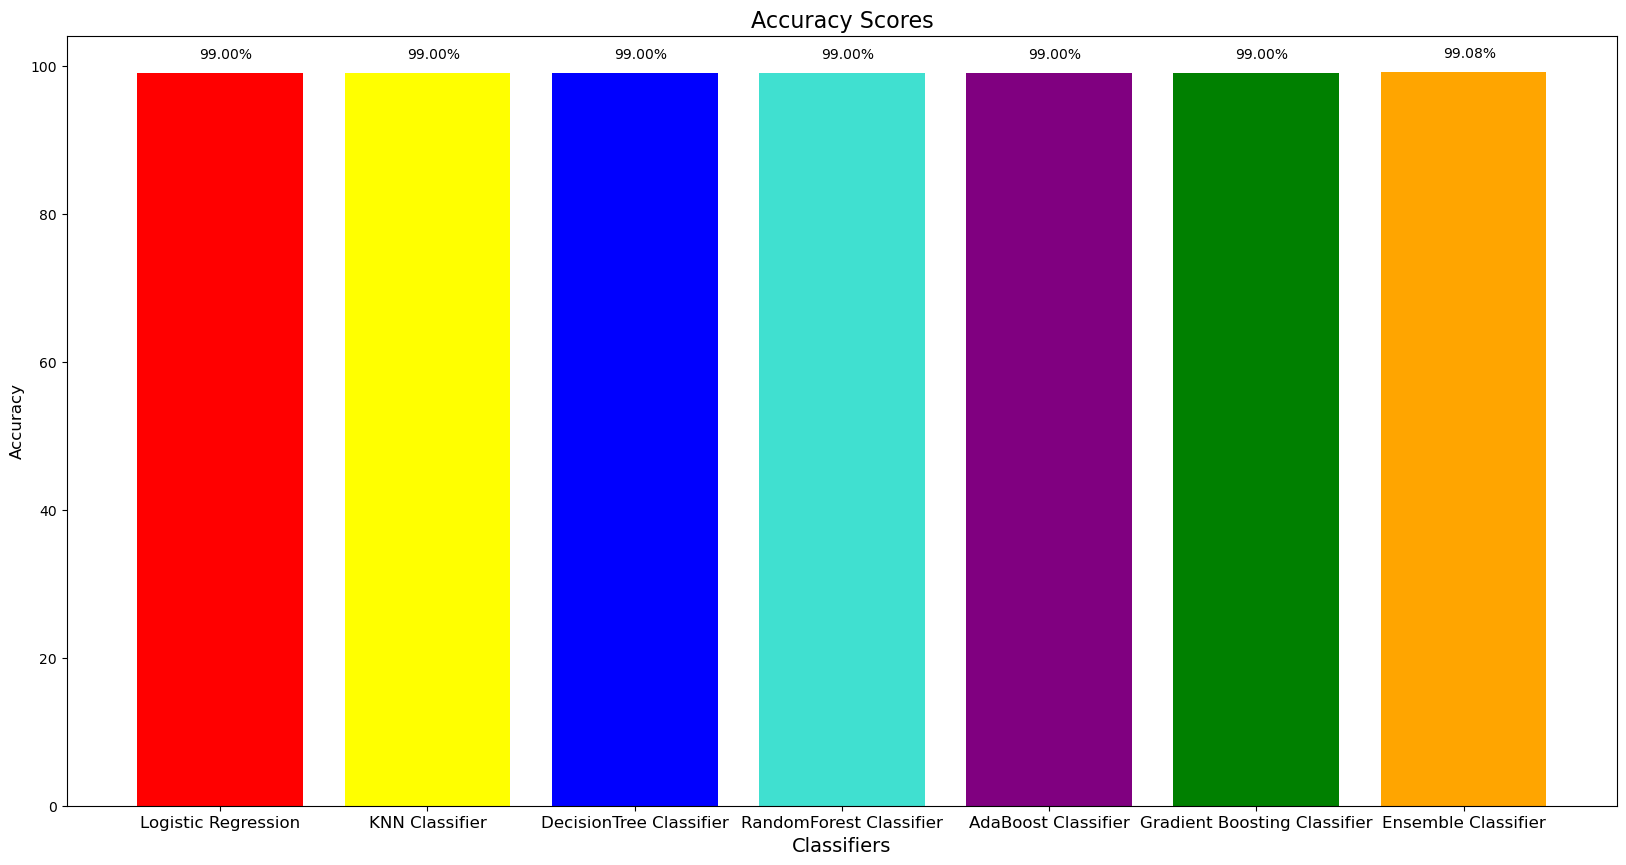

In [27]:
from matplotlib.cm import rainbow

plt.figure(figsize = (20, 10))
colors = rainbow(np.linspace(0, 1),len(Evaluation))
barplot = plt.bar(model_names,accuracies,color =['red','yellow','blue','turquoise','purple','Green','Orange'])
plt.xticks(fontsize = 12)
#plt.xticks(rotation=45)
plt.xlabel("Classifiers", fontsize = 14)
plt.ylabel("Accuracy", fontsize = 12)
plt.title("Accuracy Scores", fontsize = 16)
for i, bar in enumerate(barplot):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, 
             bar.get_height()*1.02, 
             s = '{:.2f}%'.format(accuracies[i]), 
             fontsize = 10)